In [1]:
# Langkah 2
# import package
# melakukan input NumPy dan Pandas untuk memanipulasi data
import numpy as np
import pandas as pd

In [4]:
#Langkah 3
# baca data dari file CSV
# membaca data menggunakan Pandas dari file CSV
data = pd.read_csv('dataset.csv')

In [5]:
# Langkah 4
# menampilkan data awal berupa ukutan data, informasi data dan deskripsi statistik data yang digunakan untuk memahami karakteristik data
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
# Langkah 5
# import library untuk visualisasi
# melakukan import Matplotlib dan Seaborn untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


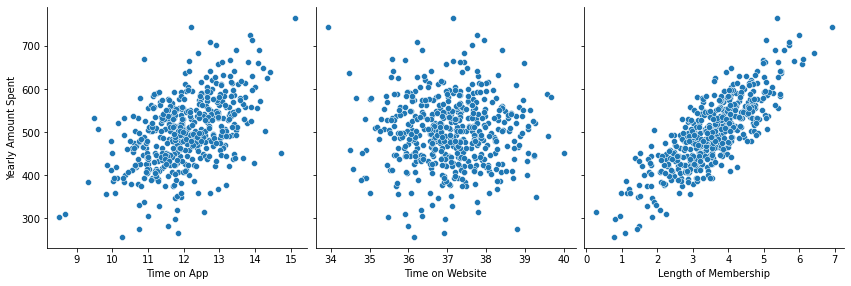

In [7]:
# visualisasi data dengan pairplot
# menggunakan pairplot untuk menampilkan hubungan antara variabel bebas dengan variabel target dalam bentuk scatter plot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

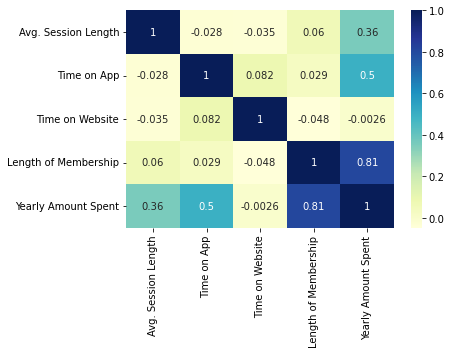

In [8]:
# visualisasi korelasi dengan heatmap
# menggunakan heatmap guna menampilkan matriks korelasi antara beberapa variabel dalam dataset, yang mana jika nilainya semakin tinggi maka semakin tinggi juga korelasinya
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [9]:
# Langkah 6
# memisahkan variabel bebas (x) dan variabel target target (y)
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

In [10]:
# Pembagian data latih dan data uji dengan proporsi 7:3
# melakukan training model regresi linier menggunakan library StatsModels
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [11]:
# Training model
# mendefinisikann titik potong dan membuat objek model regresi linier menggunakan OLS
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

c:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


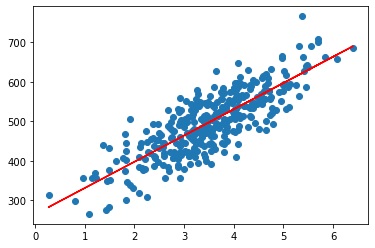

In [12]:
# Visualisasi garis regresi
# melakukan visualisasi garis regresi pada data
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

In [13]:
#Langkah 7
# Prediksi nilai y_value dari data x yang telah dilatih
# melakukan prediksi nilai selisih antara nilai sebenarnya dan nilai prediksi
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

c:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


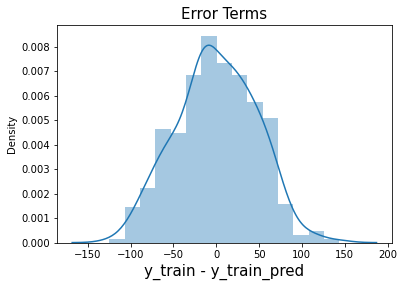

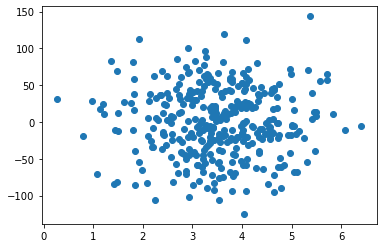

In [14]:
# Histogram residual
# melakukan visualisasi residual dalam bentuk histogram dan scatter plot untuk mengevaluasi distribusi dan pola error
fig = plt.figure()
sns.distplot(res, bins=15)

# menambahkan judul Error Terms
plt.title('Error Terms', fontsize=15)

# menambahkan label sumbu X
plt.xlabel('y_train - y_train_pred', fontsize=15)

# menampilkan plot
plt.show()

# Scatter plot residual
# membuat scatter plot untuk visualisasi hubungan residual dan independen
plt.scatter(X_train, res)
plt.show()

In [15]:
#Langkah 8 
# Prediksi pada data uji

# menambahkan kolom konstanta dalam data agar dapat melakukan prediksi dengan benar
X_test_sm = sm.add_constant(X_test)

# melakukan prediksi menggunakan model linier ('lr')
y_test_pred = lr.predict(X_test_sm)

c:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
# Hitung nilai R-squared
# melakukan penghitungan nilai R-squared guna mengetahui ukuran kinerja model pada data uji
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

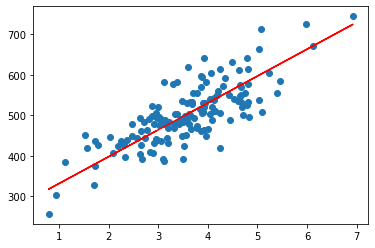

In [17]:
#Langkah 9
# Visualisasi data uji dan hasil prediksi

# membuat scatter plot data uji, 'X_test' adalah variabel independen dan 'y_test' adalah variabel dependen
plt.scatter(X_test, y_test)

# membuat garis hasil prediksi
plt.plot(X_test, y_test_pred, 'r')
plt.show()